In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats

## Objective
This gives us the max IVT in the AR 

In [2]:
start_df = pd.read_csv('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/text_data/WA_LF_ARs.csv')
start_df = start_df.drop(columns=['Unnamed: 0'])
start_df=start_df.loc[start_df['Landfall?'] == True]
start_df=start_df.drop_duplicates(subset=['AR ID']).reset_index(drop=True)

In [4]:
start_ivt = []
for i in range(0,len(start_df)):
    ar_test = xr.open_dataset(start_df['AR ID'].iloc[i])

    ivt =  ar_test['max_running_field'].max().values
    start_ivt += [ivt]

start_ivt = np.array(start_ivt)

In [5]:
#need stats
print(start_ivt.mean())
print(start_ivt.max())
print(start_ivt.min())
print(np.median(start_ivt))

1586.9376167629075
3574.81494140625
623.35302734375
1495.7078857421875


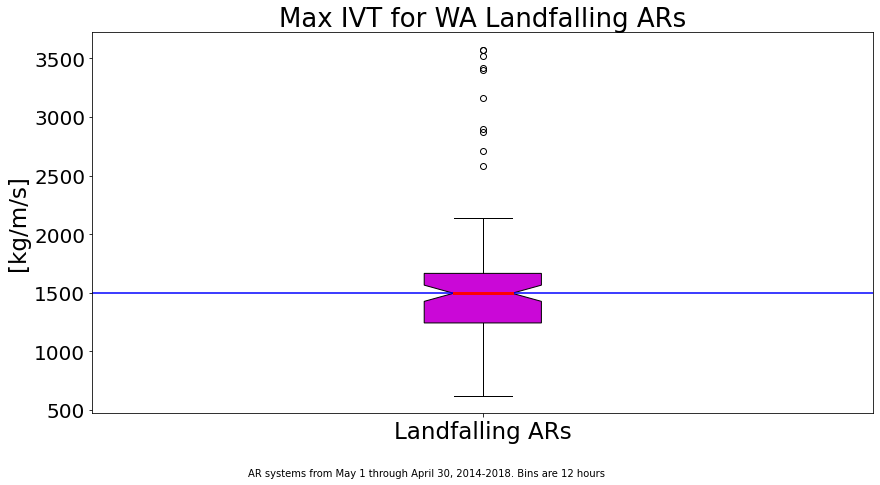

In [7]:
#plot the correct max real quick
#plot the box plot

ticksize =20
legendsize=23
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [start_ivt]
type_labels = ['Landfalling ARs']

colors = ['#CA08D7']

bp=ax.boxplot(data_area, notch=True, patch_artist = True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)


ax.set_xticklabels(type_labels, fontsize = legendsize)
plt.axhline(y = 1495, color = 'blue', linestyle = '-')
ax.set_title('Max IVT for WA Landfalling ARs', fontsize=titlesize)
ax.set_ylabel('[kg/m/s]', fontsize=legendsize)
plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Project_plots/WA_LF_Max_IVT_1hr.png", dpi=350, bbox_inches='tight')
plt.show()